# Training

In [1]:
# Important libraries
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import random

# File paths
fp_notebooks_folder = "./"
fp_code_folder = "../"
fp_processed_folder = os.path.join(fp_code_folder, "../processed_data")
fp_downsampled_folder = os.path.join(fp_processed_folder, "downsampled")
fp_downsampled_dropna_file = os.path.join(fp_downsampled_folder, "dropna.csv")

# Check GPU is available
print(tf.config.list_physical_devices('GPU'))

# function to show df
def display_df(df):
    display(df.head())
    print("Shape:", df.shape)

2023-08-25 13:32:40.940922: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 13:32:41.374637: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-08-25 13:32:42.039618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-25 13:32:42.053100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-25 13:32:42.053246: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Load Data

In [2]:
df = pd.read_csv(fp_downsampled_dropna_file, index_col=0)
df

,ABPdias (mmHg)_mean Min0,ABPsys (mmHg)_mean Min0,RESP (bpm)_mean Min0,SpO2 (%)_mean Min0,HR (bpm)_mean Min0,ABPmean (mmHg)_mean Min0,ABPdias (mmHg)_std Min0,ABPsys (mmHg)_std Min0,RESP (bpm)_std Min0,SpO2 (%)_std Min0,...,HR (bpm)_std Min4,ABPmean (mmHg)_std Min4,target,target_index,input_start_index,input_end_index,record,train,valid,test
0,0.239745,-0.198451,-1.733973,0.582678,-1.216730,-0.008276,1.634416,1.844639,0.000000,0.017265,...,0.081612,0.104015,1.065938,5,0,4,048n,True,False,False
1,0.030645,0.013556,-1.733973,0.517948,-0.183695,0.046774,0.173778,0.325756,0.000000,0.016037,...,0.078545,0.156026,1.234807,6,1,5,048n,True,False,False
2,-0.182688,-0.053949,-1.733973,0.512354,-0.233851,-0.072996,0.050965,0.075383,0.000000,0.013217,...,0.054664,0.111421,1.949710,7,2,6,048n,True,False,False
3,0.057735,0.158585,-1.733973,0.507159,-0.155537,0.172496,0.251661,0.136551,0.000000,0.015179,...,0.149381,0.249624,1.728023,8,3,7,048n,True,False,False
4,1.187045,0.942799,-1.733973,0.249438,0.015169,1.089744,0.126809,0.130327,0.000000,0.781539,...,0.049078,0.357108,1.056268,9,4,8,048n,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119795,-0.598348,0.125888,0.528508,0.589071,0.221952,-0.401063,0.056338,0.071321,0.065449,0.011980,...,0.044509,0.081644,-0.563980,937,932,936,476n,True,False,False
119796,-0.636443,0.040452,0.708332,0.575485,0.189394,-0.481406,0.071934,0.161554,0.281234,0.000000,...,0.047446,0.078749,-0.441978,938,933,937,476n,True,False,False
119797,-0.623745,0.074205,0.469790,0.587073,0.214912,-0.468015,0.044154,0.095143,0.144036,0.012081,...,0.040431,0.082709,-0.262695,939,934,938,476n,True,False,False
119798,-0.620359,0.081060,0.376208,0.580280,0.197314,-0.479918,0.042334,0.075623,0.076295,0.009671,...,0.060568,0.101551,-0.154083,940,935,939,476n,True,False,False


In [3]:
predictors = df.columns[:60].to_list()
print(predictors)

['ABPdias (mmHg)_mean Min0', 'ABPsys (mmHg)_mean Min0', 'RESP (bpm)_mean Min0', 'SpO2 (%)_mean Min0', 'HR (bpm)_mean Min0', 'ABPmean (mmHg)_mean Min0', 'ABPdias (mmHg)_std Min0', 'ABPsys (mmHg)_std Min0', 'RESP (bpm)_std Min0', 'SpO2 (%)_std Min0', 'HR (bpm)_std Min0', 'ABPmean (mmHg)_std Min0', 'ABPdias (mmHg)_mean Min1', 'ABPsys (mmHg)_mean Min1', 'RESP (bpm)_mean Min1', 'SpO2 (%)_mean Min1', 'HR (bpm)_mean Min1', 'ABPmean (mmHg)_mean Min1', 'ABPdias (mmHg)_std Min1', 'ABPsys (mmHg)_std Min1', 'RESP (bpm)_std Min1', 'SpO2 (%)_std Min1', 'HR (bpm)_std Min1', 'ABPmean (mmHg)_std Min1', 'ABPdias (mmHg)_mean Min2', 'ABPsys (mmHg)_mean Min2', 'RESP (bpm)_mean Min2', 'SpO2 (%)_mean Min2', 'HR (bpm)_mean Min2', 'ABPmean (mmHg)_mean Min2', 'ABPdias (mmHg)_std Min2', 'ABPsys (mmHg)_std Min2', 'RESP (bpm)_std Min2', 'SpO2 (%)_std Min2', 'HR (bpm)_std Min2', 'ABPmean (mmHg)_std Min2', 'ABPdias (mmHg)_mean Min3', 'ABPsys (mmHg)_mean Min3', 'RESP (bpm)_mean Min3', 'SpO2 (%)_mean Min3', 'HR (bpm)_

In [4]:
pred_col = "target"

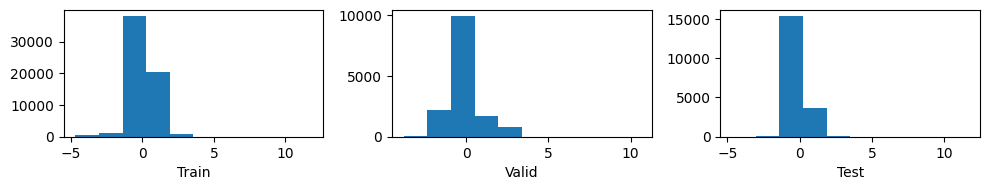

In [8]:
# Make train, validation and test sets
def train_valid_test_split(df):
    df_train, df_valid, df_test = df[df["train"]], df[df["valid"]], df[df["test"]]
    
    # Plot distribution of pred_col for each set
    fig, axes = plt.subplots(1, 3, figsize=(10, 2))
    axes[0].hist(df_train["target"])
    axes[0].set_xlabel("Train")
    axes[1].hist(df_valid["target"])
    axes[1].set_xlabel("Valid")
    axes[2].hist(df_test["target"])
    axes[2].set_xlabel("Test")
    
    plt.tight_layout()

    return df_train, df_valid, df_test

df_train, df_valid, df_test = train_valid_test_split(df)

## Model Definition

In [32]:
def set_seed(seed):
    tf.config.experimental.enable_op_determinism()
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.keras.utils.set_random_seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

def display_history(history, show_acc=False):
    if show_acc:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 2.5))
        axes[0].plot(history.history['loss'])
        axes[0].plot(history.history['val_loss'])
        axes[0].set_title('Model Loss')
        axes[0].set_ylabel('Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].legend(['Train', 'Val'], loc='upper left')
        axes[1].plot(history.history['accuracy'])
        axes[1].plot(history.history['val_accuracy'])
        axes[1].set_title('Model Accuracy')
        axes[1].set_ylabel('Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].legend(['Train', 'Val'], loc='upper left')
        axes[2].plot(history.history['f1_score'])
        axes[2].plot(history.history['val_f1_score'])
        axes[2].set_title('Model F1 Score')
        axes[2].set_ylabel('F1 Score')
        axes[2].set_xlabel('Epoch')
        axes[2].legend(['Train', 'Val'], loc='upper left')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 2.5))
        axes.plot(history.history['loss'])
        axes.plot(history.history['val_loss'])
        axes.set_title('Model Loss')
        axes.set_ylabel('Loss')
        axes.set_xlabel('Epoch')
        axes.legend(['Train', 'Val'], loc='upper left')
    plt.tight_layout()
    plt.show()

class AE_Regressor:
    def __init__(self, width, predictors):
        from keras.layers import Dense
        self.predictors = predictors
        self.num_predictors = len(self.predictors)
        self.width = width
        
        # Instantiate model layers
        self.inputs = tf.keras.Input(shape=(self.num_predictors,))
        self.encoder = Dense(
            self.width, activation=tf.keras.layers.LeakyReLU(alpha=0.3), 
            name="encoder", kernel_regularizer="l2")
        self.decoder = Dense(self.num_predictors, name="decoder")
        self.regressor = Dense(1, name="regressor")
    
    # Smote is external
    def train_regressor(
        self, train_X, train_y, val_X, val_y, batch_size, max_epochs, verbose, patience):
        from tensorflow.keras.callbacks import EarlyStopping
        # Define regressor
        pred = self.encoder(self.inputs)
        pred = self.regressor(pred)
        self.predictor = tf.keras.Model(inputs=self.inputs, outputs=pred, name="regression_model")
        # Train classifier
        self.predictor.compile(
            loss="mse",
            optimizer=tf.keras.optimizers.Adam()
        )
        es = EarlyStopping(
            monitor='val_loss', mode='min', verbose=1, patience=patience, restore_best_weights=True)
        self.predictor_history = self.predictor.fit(
            train_X, train_y, 
            epochs=max_epochs, 
            validation_data=(val_X, val_y),
            verbose=verbose,
            batch_size=batch_size,
            callbacks=[es],
        )
        print("- Regressor Training History")
        display_history(self.predictor_history)
        best_index = np.argmin(self.predictor_history.history['val_loss'])
        return (
            self.predictor_history.history['val_loss'][best_index], 
            best_index
        )
        
    def train_decoder(
        self, train_X, val_X, batch_size, max_epochs, verbose, patience):
        from tensorflow.keras.callbacks import EarlyStopping
        # Define AE
        self.encoder.trainable=False # Freeze weights
        x = self.encoder(self.inputs)
        x = self.decoder(x)
        self.ae = tf.keras.Model(inputs=self.inputs, outputs=x, name="ae_model")
        # Train AE
        self.ae.compile(
            loss="mse",
            optimizer=tf.keras.optimizers.Adam()
        )
        es = EarlyStopping(
            monitor='val_loss', mode='min', verbose=1, patience=patience,restore_best_weights=True)
        self.ae_history = self.ae.fit(
            train_X, train_X, 
            epochs=max_epochs, 
            validation_data=(val_X, val_X),
            verbose=verbose,
            batch_size=batch_size,
            callbacks=[es]
        )
        print("- Autoencoder Training History")
        display_history(self.ae_history)
        return min(self.ae_history.history['val_loss'])

    def predict(self, inputs, with_mae=False):
        # Encode
        encoder_output = self.encoder(inputs)

        # Reconstruct
        decoder_output = self.decoder(encoder_output).numpy()

        # Calculate reconstruction error
        mae = tf.math.abs(decoder_output - inputs)
        mae = tf.reduce_mean(mae, [-1]).numpy()

        # Get forecast result
        regressor_output = self.regressor(encoder_output).numpy()

        if with_mae:
            return regressor_output, mae
        else:
            return regressor_output
        
def save_model(model, name, fp_checkpoints, override=False):
    import pickle
    model_folder = os.path.join(fp_checkpoints, name)
    if os.path.exists(model_folder):
        print("Model checkpoint already exists!")
        if not override:
            return
    else:
        os.makedirs(model_folder)
    
    # Save Parameters
    parameters_to_save = dict(
        predictors = model.predictors,
        width = model.width
    )   
    parameter_filename = os.path.join(fp_checkpoints, name, "parameters.pickle")
    with open(parameter_filename, 'wb') as handle:
        pickle.dump(parameters_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    # Save Model
    inputs = model.inputs
    encoder_output = model.encoder(inputs)
    decoder_output = model.decoder(encoder_output)
    regressor_output = model.regressor(encoder_output)
    model = tf.keras.Model(inputs, [regressor_output, decoder_output])
    model_filename = os.path.join(fp_checkpoints, name, "model.h5")
    model.save(model_filename)
    print("Model saved!")

def load_model(name, fp_checkpoints): 
    import pickle
    model_folder = os.path.join(fp_checkpoints, name)
    parameter_filename = os.path.join(fp_checkpoints, name, "parameters.pickle")
    model_filename = os.path.join(fp_checkpoints, name, "model.h5")
    
    if not os.path.exists(model_folder):
        print("model checkpoint does not exist!")
        return
    model = tf.keras.models.load_model(model_filename)
    with open(parameter_filename, 'rb') as handle:
        parameters = pickle.load(handle)
    
    ae_regressor = AE_Regressor(
        parameters["width"], parameters["predictors"])
    ae_regressor.encoder = model.get_layer("encoder")
    ae_regressor.decoder = model.get_layer("decoder")
    ae_regressor.regressor = model.get_layer("regressor")
    
    return ae_regressor

def model_tuning(
    width_list, predictors, pred_col, num_class, train_df, valid_df, seed,
    batch_size=128, max_epochs=5000, verbose=1, patience=10):
    
    train_X, train_y = (
        train_df[predictors].values.astype('float32'), train_df[pred_col].values.astype('float32'))
    valid_X, valid_y = (
        valid_df[predictors].values.astype('float32'), valid_df[pred_col].values.astype('float32'))
    loss_list = []
    epoch_list = []
    time_spent_list = []
    for width in tqdm(width_list):
        set_seed(seed)
        regressor = AE_Regressor(width, predictors)
        start = time.time()
        val_loss, best_epoch = regressor.train_regressor(
            train_X, train_y, valid_X, valid_y, 
            batch_size, max_epochs, verbose, patience)
        loss_list.append(val_loss)
        epoch_list.append(best_epoch)
        time_spent_list.append(time.time()-start)
    tuning_df = pd.DataFrame(
        {"width": width_list, "loss": loss_list, 
         "epochs": epoch_list,"time/s": time_spent_list})
    best_width_idx = tuning_df['loss'].idxmin()
    best_width = tuning_df['width'].tolist()[best_width_idx]
    return tuning_df, best_width

def model_training(
    width, predictors, pred_col, train_df, valid_df, seed,
    batch_size=128, max_epochs=5000, verbose=1, patience=10):
    
    from tqdm import tqdm
    import time
    set_seed(seed)
    
    # Get data
    train_X, train_y = (
        train_df[predictors].values.astype('float32'), train_df[pred_col].values.astype('float32'))
    valid_X, valid_y = (
        valid_df[predictors].values.astype('float32'), valid_df[pred_col].values.astype('float32'))
    
    # Train Regressor
    ae_regressor = AE_Regressor(width, predictors)
    
    start = time.time()
    # Train classifier
    valid_loss_regressor, best_epoch = ae_regressor.train_regressor(
        train_X, train_y, valid_X, valid_y, 
        batch_size, max_epochs, verbose, patience)
    
    # Train decoder
    valid_loss_ae = ae_regressor.train_decoder(
        train_X, valid_X, batch_size, max_epochs, verbose, patience)
    
    print(f"Training took {time.time()-start}s.")
    return ae_regressor

## Model Tuning

### With Only Mean Predictors

In [11]:
predictors_only_mean = [pred for pred in predictors if "_mean" in pred]
print(len(predictors_only_mean), "Predictors:", predictors_only_mean)

30 Predictors: ['ABPdias (mmHg)_mean Min0', 'ABPsys (mmHg)_mean Min0', 'RESP (bpm)_mean Min0', 'SpO2 (%)_mean Min0', 'HR (bpm)_mean Min0', 'ABPmean (mmHg)_mean Min0', 'ABPdias (mmHg)_mean Min1', 'ABPsys (mmHg)_mean Min1', 'RESP (bpm)_mean Min1', 'SpO2 (%)_mean Min1', 'HR (bpm)_mean Min1', 'ABPmean (mmHg)_mean Min1', 'ABPdias (mmHg)_mean Min2', 'ABPsys (mmHg)_mean Min2', 'RESP (bpm)_mean Min2', 'SpO2 (%)_mean Min2', 'HR (bpm)_mean Min2', 'ABPmean (mmHg)_mean Min2', 'ABPdias (mmHg)_mean Min3', 'ABPsys (mmHg)_mean Min3', 'RESP (bpm)_mean Min3', 'SpO2 (%)_mean Min3', 'HR (bpm)_mean Min3', 'ABPmean (mmHg)_mean Min3', 'ABPdias (mmHg)_mean Min4', 'ABPsys (mmHg)_mean Min4', 'RESP (bpm)_mean Min4', 'SpO2 (%)_mean Min4', 'HR (bpm)_mean Min4', 'ABPmean (mmHg)_mean Min4']


  0%|                                                     | 0/6 [00:00<?, ?it/s]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.0636 - val_loss: 0.6975
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5948 - val_loss: 0.5447
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5355 - val_loss: 0.5060
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4973 - val_loss: 0.4716
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4658 - val_loss: 0.4439
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4381 - val_loss: 0.4189
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4137 - val_loss: 0.3950
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3915 - val_loss: 0.3737
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3712 - val_loss: 0.3550
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3530 - val_lo

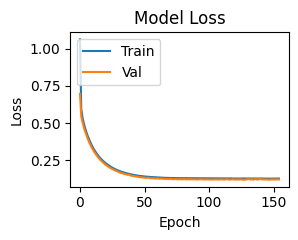

 17%|███████▌                                     | 1/6 [00:08<00:41,  8.21s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.8739 - val_loss: 0.6665
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6165 - val_loss: 0.5694
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5504 - val_loss: 0.5193
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5046 - val_loss: 0.4766
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4649 - val_loss: 0.4387
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4291 - val_loss: 0.4053
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3970 - val_loss: 0.3762
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3681 - val_loss: 0.3477
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3418 - val_loss: 0.3230
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3185 - val_lo

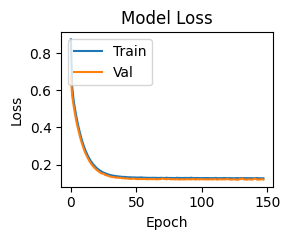

 33%|███████████████                              | 2/6 [00:16<00:31,  7.99s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.8406 - val_loss: 0.6786
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6015 - val_loss: 0.5532
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5252 - val_loss: 0.4850
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4655 - val_loss: 0.4320
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4172 - val_loss: 0.3879
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3766 - val_loss: 0.3513
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3427 - val_loss: 0.3221
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3137 - val_loss: 0.2944
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2886 - val_loss: 0.2703
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2672 - val_lo

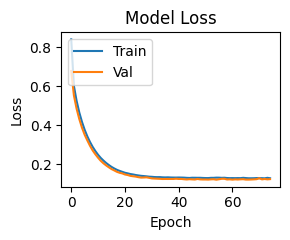

 50%|██████████████████████▌                      | 3/6 [00:20<00:18,  6.30s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.8818 - val_loss: 0.6645
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6047 - val_loss: 0.5448
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5156 - val_loss: 0.4692
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4467 - val_loss: 0.4101
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3913 - val_loss: 0.3580
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3458 - val_loss: 0.3189
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3091 - val_loss: 0.2870
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2789 - val_loss: 0.2586
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2537 - val_loss: 0.2356
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2331 - val_lo

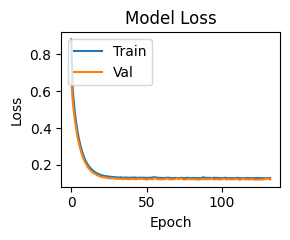

 67%|██████████████████████████████               | 4/6 [00:27<00:13,  6.65s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.7835 - val_loss: 0.6062
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5581 - val_loss: 0.4898
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4501 - val_loss: 0.3981
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3714 - val_loss: 0.3346
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3130 - val_loss: 0.2804
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2683 - val_loss: 0.2429
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2349 - val_loss: 0.2144
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2091 - val_loss: 0.1902
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1898 - val_loss: 0.1755
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1752 - val_lo

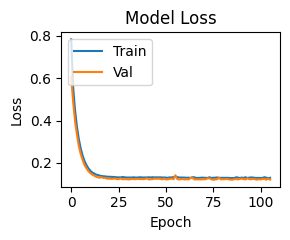

 83%|█████████████████████████████████████▌       | 5/6 [00:33<00:06,  6.54s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.7561 - val_loss: 0.5788
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5192 - val_loss: 0.4482
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4095 - val_loss: 0.3598
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3349 - val_loss: 0.3019
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2812 - val_loss: 0.2514
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2409 - val_loss: 0.2195
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2115 - val_loss: 0.1946
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1892 - val_loss: 0.1728
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1736 - val_loss: 0.1606
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1622 - val_lo

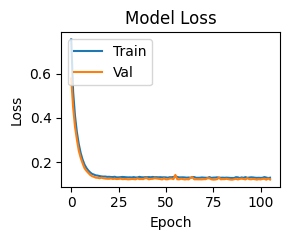

100%|█████████████████████████████████████████████| 6/6 [00:40<00:00,  6.70s/it]


In [22]:
tuning_df, best_width = model_tuning(
    width_list=[64, 128, 256, 512, 1024, 1536], predictors=predictors_only_mean, pred_col=pred_col, 
    num_class=2, train_df=df_train, valid_df=df_valid, seed=2023,
    batch_size=2048, max_epochs=10000, verbose=1, patience=20
)

In [24]:
tuning_df

,width,loss,epochs,time/s
0,64,0.119306,134,8.200280
1,128,0.119087,127,7.830342
2,256,0.120642,54,4.295624
3,512,0.119542,112,7.163418
4,1024,0.120464,85,6.346341
5,1536,0.120240,85,6.360390


### With All Predictors

  0%|                                                     | 0/6 [00:00<?, ?it/s]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.4865 - val_loss: 0.8029
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.7539 - val_loss: 0.7002
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6454 - val_loss: 0.5960
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5724 - val_loss: 0.5304
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5151 - val_loss: 0.4798
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4681 - val_loss: 0.4386
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4294 - val_loss: 0.4017
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3976 - val_loss: 0.3719
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3706 - val_loss: 0.3478
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3477 - val_lo

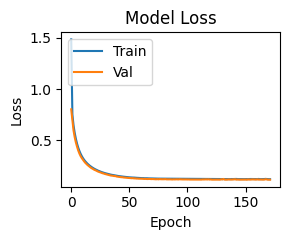

 17%|███████▌                                     | 1/6 [00:09<00:46,  9.38s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.0101 - val_loss: 0.8505
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.7649 - val_loss: 0.6756
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6214 - val_loss: 0.5525
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5132 - val_loss: 0.4600
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4324 - val_loss: 0.3898
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3707 - val_loss: 0.3372
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3238 - val_loss: 0.2989
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2881 - val_loss: 0.2659
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2592 - val_loss: 0.2404
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2364 - val_lo

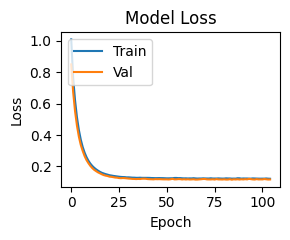

 33%|███████████████                              | 2/6 [00:15<00:29,  7.36s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1776 - val_loss: 0.9366
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.8141 - val_loss: 0.7070
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6429 - val_loss: 0.5669
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5240 - val_loss: 0.4692
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4410 - val_loss: 0.3985
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3801 - val_loss: 0.3472
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3345 - val_loss: 0.3087
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3001 - val_loss: 0.2778
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2712 - val_loss: 0.2519
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2479 - val_lo

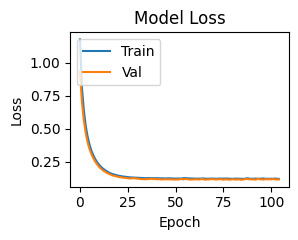

 50%|██████████████████████▌                      | 3/6 [00:21<00:20,  6.71s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1811 - val_loss: 0.8831
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.7617 - val_loss: 0.6339
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5613 - val_loss: 0.4821
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4402 - val_loss: 0.3916
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3649 - val_loss: 0.3262
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3114 - val_loss: 0.2837
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2732 - val_loss: 0.2518
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2450 - val_loss: 0.2252
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2216 - val_loss: 0.2059
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2034 - val_lo

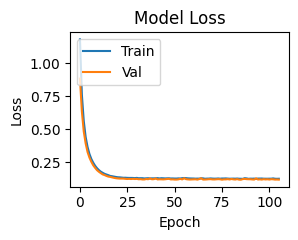

 67%|██████████████████████████████               | 4/6 [00:27<00:13,  6.51s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1605 - val_loss: 0.8157
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6785 - val_loss: 0.5427
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4770 - val_loss: 0.4053
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3696 - val_loss: 0.3282
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3053 - val_loss: 0.2712
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2588 - val_loss: 0.2338
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2257 - val_loss: 0.2077
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2021 - val_loss: 0.1837
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1833 - val_loss: 0.1704
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1696 - val_lo

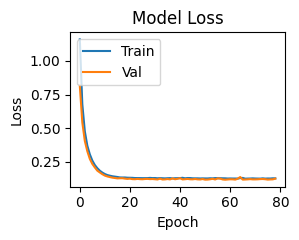

 83%|█████████████████████████████████████▌       | 5/6 [00:32<00:05,  5.89s/it]

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.1129 - val_loss: 0.7665
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6188 - val_loss: 0.4860
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4275 - val_loss: 0.3617
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3298 - val_loss: 0.2907
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2714 - val_loss: 0.2402
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2293 - val_loss: 0.2078
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2005 - val_loss: 0.1867
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1803 - val_loss: 0.1635
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1654 - val_loss: 0.1527
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.1555 - val_lo

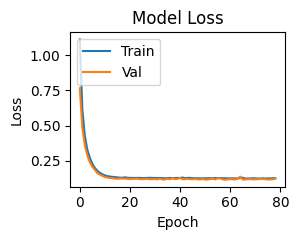

100%|█████████████████████████████████████████████| 6/6 [00:37<00:00,  6.21s/it]


In [29]:
tuning_df, best_width = model_tuning(
    width_list=[64, 128, 256, 512, 1024, 1536], predictors=predictors, pred_col=pred_col, 
    num_class=2, train_df=df_train, valid_df=df_valid, seed=2023,
    batch_size=2048, max_epochs=10000, verbose=1, patience=20
)

In [30]:
tuning_df

,width,loss,epochs,time/s
0,64,0.115218,151,9.376723
1,128,0.115408,84,5.936778
2,256,0.115884,84,5.936425
3,512,0.115928,85,6.191496
4,1024,0.116651,58,4.789165
5,1536,0.116691,58,4.979738


## Model Training

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 1.4865 - val_loss: 0.8029
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.7539 - val_loss: 0.7002
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.6454 - val_loss: 0.5960
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5724 - val_loss: 0.5304
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.5151 - val_loss: 0.4798
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4681 - val_loss: 0.4386
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4294 - val_loss: 0.4017
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3976 - val_loss: 0.3719
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3706 - val_loss: 0.3478
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3477 - val_lo

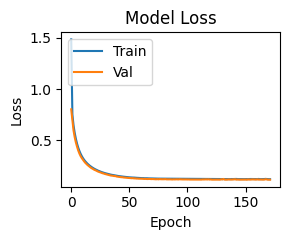

Epoch 1/10000
30/30 [==============================] - 0s 4ms/step - loss: 0.5047 - val_loss: 0.5299
Epoch 2/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4522 - val_loss: 0.4911
Epoch 3/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.4128 - val_loss: 0.4581
Epoch 4/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3797 - val_loss: 0.4286
Epoch 5/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3512 - val_loss: 0.4018
Epoch 6/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3264 - val_loss: 0.3780
Epoch 7/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.3048 - val_loss: 0.3567
Epoch 8/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2860 - val_loss: 0.3377
Epoch 9/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2697 - val_loss: 0.3207
Epoch 10/10000
30/30 [==============================] - 0s 2ms/step - loss: 0.2553 - val_lo

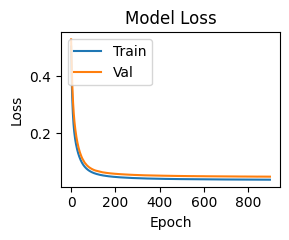

Training took 55.3725368976593s.


In [33]:
ae_regressor = model_training(
    width=best_width, predictors=predictors, pred_col=pred_col, 
    train_df=df_train, valid_df = df_valid, seed=2023,
    batch_size=2048, max_epochs=10000, verbose=1, patience=20
)

## Model Evaluation

### Generic Performance Metrics

MSE: 0.13248022
MAE-SE Correlation: 0.8184789658733309


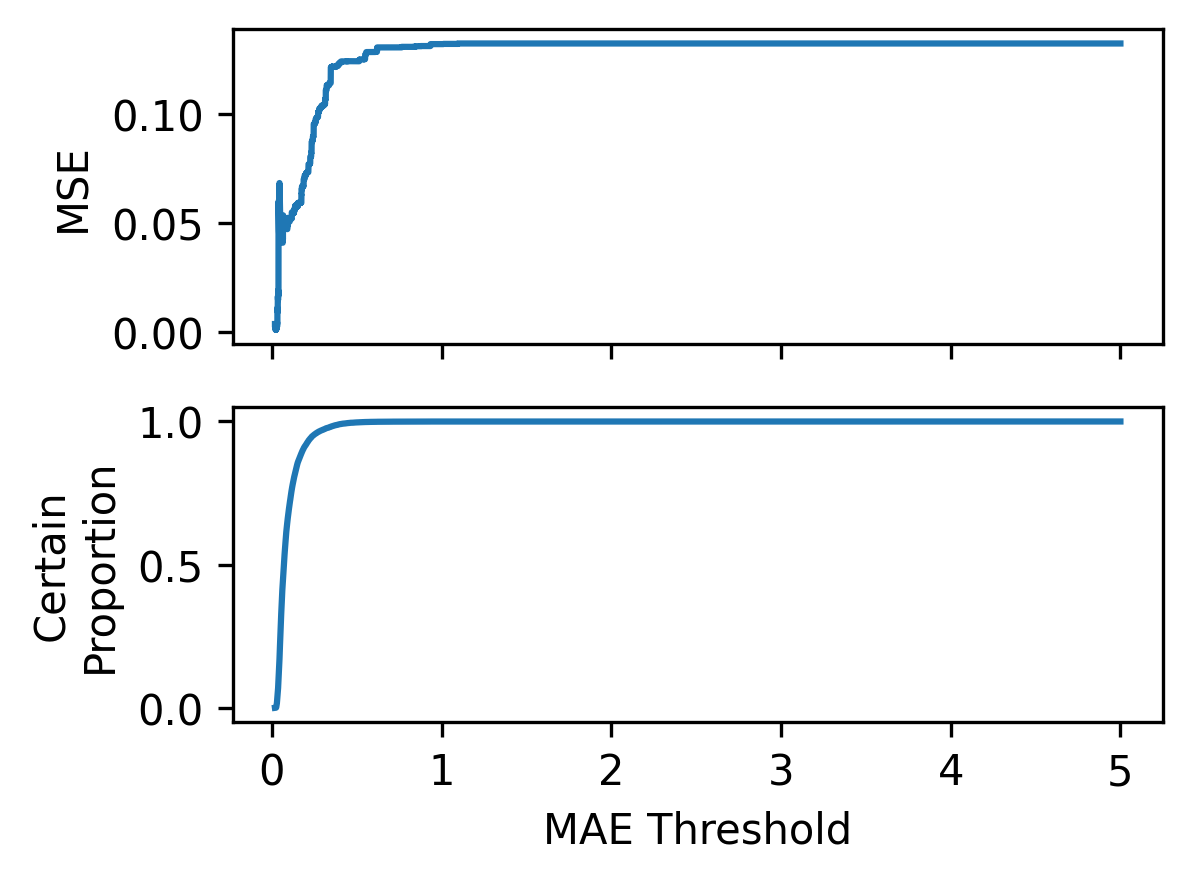

In [74]:
def model_evaluation(ae_regressor, df_test, pred_col, predictors):
    test_X, test_y = (
        df_test[predictors].values.astype('float32'), df_test[pred_col].values.astype('float32'))
    test_y_pred, mae = ae_regressor.predict(inputs=test_X, with_mae=True)
    test_y_pred = test_y_pred.flatten()
    
    # MSE
    se = (test_y-test_y_pred)**2
    mse = tf.keras.losses.MeanSquaredError()(test_y, test_y_pred).numpy()
    print("MSE:", mse)
    
    # Correlation
    from scipy.stats import pearsonr
    corr, p_value = pearsonr(test_y, test_y_pred)
    print("MAE-SE Correlation:", corr)
    
    # Threshold plot
    generate_threshold_graph(se, mae, start=0, end=5, step=0.0001)
    

#     plt.scatter(mae, se)
    
def generate_threshold_graph(se, mae, start, end, step):
    mse_list = []
    threshold_list = []
    num_conf_list = []
    cur = start
    while cur <= end:
        confident = mae <= cur
        num_conf = np.sum(confident)
        if num_conf == 0:
            cur += step
            continue
        cur_mse = np.mean(se[confident])
        threshold_list.append(cur)
        mse_list.append(cur_mse)
        num_conf_list.append(num_conf)
        cur += step
    prop_list = np.array(num_conf_list)/len(se)
    fig, axes = plt.subplots(2, 1, figsize=(4, 3), sharex=True, dpi=300)
    axes[0].plot(threshold_list, mse_list)
    axes[0].set_ylabel("MSE")
    
    axes[1].plot(threshold_list, prop_list)
    axes[1].set_xlabel("MAE Threshold")
    axes[1].set_ylabel("Certain\nProportion")
    
model_evaluation(ae_regressor, df_test, pred_col, predictors)

### Analysis With XAI